20000


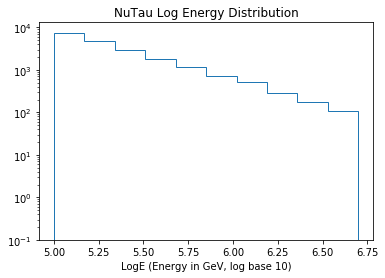

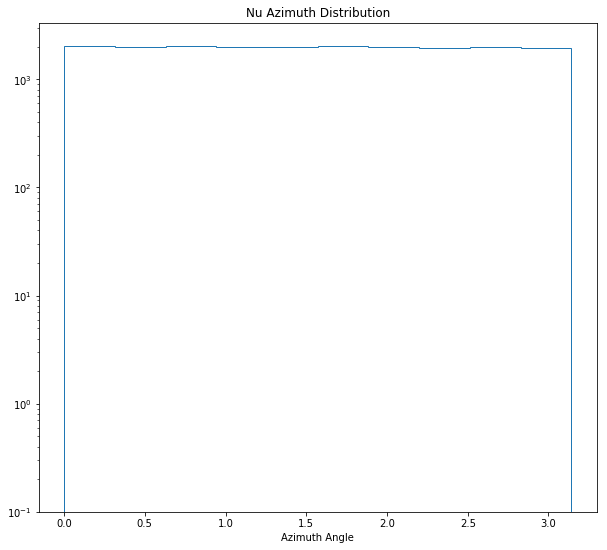

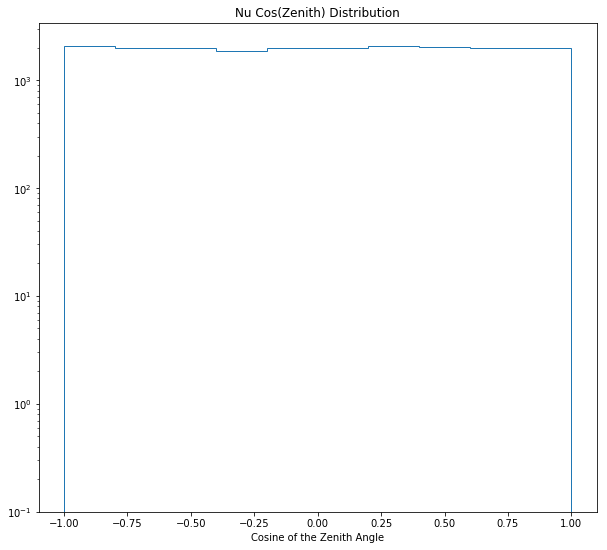

In [5]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
import matplotlib.pyplot as plt
import numpy as np
import argparse, matplotlib

# open file
infileList = []
for i in range(0, 1000):
    infile = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(i)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    infileList.append(infile)

zenith = []
azimuth = []
energy = []
tauX = ([])
tauY = ([])
tauZ = ([])

for infile in infileList:
    while( infile.more() ):
        frame = infile.pop_daq()
        primary = frame["NuGPrimary"]
        mctree = frame["I3MCTree"]
        mcTreeprimary = mctree.primaries
        tau = dataclasses.I3MCTree.first_child(mctree, mcTreeprimary[0].id)
        tauPosition = tau.pos
        tauX = np.append(tauX, tauPosition.x)
        tauY = np.append(tauY, tauPosition.y)
        tauZ = np.append(tauZ, tauPosition.z)
        zenith.append(np.cos(primary.dir.zenith))
        azimuth.append(primary.dir.azimuth)
        energy.append(primary.energy)

logE = np.log10(energy)
print(len(logE))
plt.hist(logE, histtype = "step", log = True)
plt.title("NuTau Log Energy Distribution")
plt.xlabel("LogE (Energy in GeV, log base 10)")
plt.show()
#plt.savefig("NuTauEnergyDistributions.pdf", dpi = 200)
#plt.clf()

plt.figure(figsize=(10, 9))
plt.hist(azimuth, histtype = "step", log = True)
plt.title("Nu Azimuth Distribution")
plt.xlabel("Azimuth Angle")
#plt.savefig("NuTauAzimuthDistributions.pdf", dpi=200)
plt.show()
#plt.clf()

plt.figure(figsize=(10, 9))
plt.hist(zenith, histtype = "step", log = True)
plt.title("Nu Cos(Zenith) Distribution")
plt.xlabel("Cosine of the Zenith Angle")
plt.show()
#plt.savefig("NuTauZenithDistribution.pdf", dpi=200)
#plt.clf()

#np.savetxt('tauPositions.csv', (tauX,tauY,tauZ))